<a href="https://colab.research.google.com/github/Psousace/Dados_BC/blob/main/ME_Indicadores_do_Banco_Central_do_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Me Ensinou
##Link Video: https://www.youtube.com/watch?v=pplHh_OAHwU


In [ ]:
!pip install python-bcb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.


In [ ]:
from bcb import sgs
import pandas as pd
import matplotlib.pyplot as plt

# Obter Dados Econômicos Banco Central do Brasil

In [ ]:
#IPCA
ipca = sgs.get(433) #Monthly % var.
ipca_12m = sgs.get(13522)

<Axes: title={'center': 'IPCA 12 meses'}, xlabel='Date'>

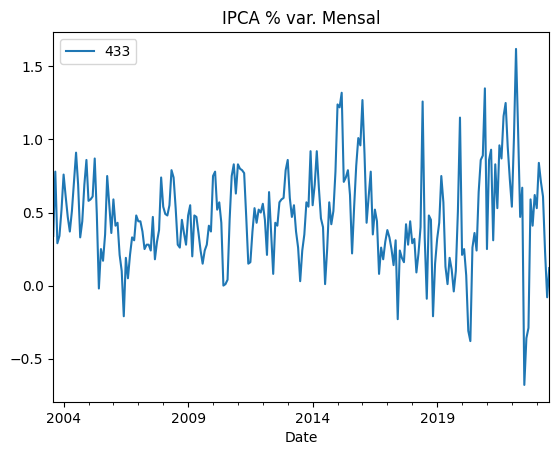

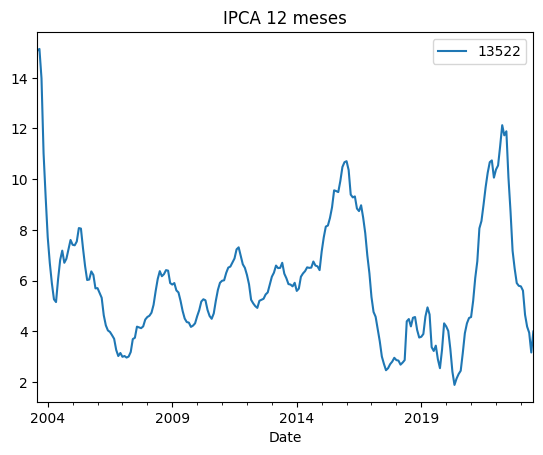

In [ ]:
#plot IPCA
ipca.iloc[-12*20:,:].plot(title = 'IPCA % var. Mensal')
ipca_12m.iloc[-12*20:,:].plot(title = 'IPCA 12 meses')

In [ ]:
ipca_12m

,13522
Date,
1980-12-01,99.25
1981-01-01,99.67
1981-02-01,103.07
1981-03-01,101.03
1981-04-01,103.27
...,...
2023-03-01,4.65
2023-04-01,4.18
2023-05-01,3.94


In [ ]:
#SELIC
selic = sgs.get(11)  #% p.d.

selic_anual = sgs.get(1178) #% p.y.
selic_target = sgs.get(432)

In [ ]:
selic

,11
Date,
1986-06-04,0.065041
1986-06-05,0.067397
1986-06-06,0.066740
1986-06-09,0.068247
1986-06-10,0.067041
...,...
2023-08-16,0.049037
2023-08-17,0.049037
2023-08-18,0.049037


<Axes: title={'center': 'SELIC %'}, xlabel='Date'>

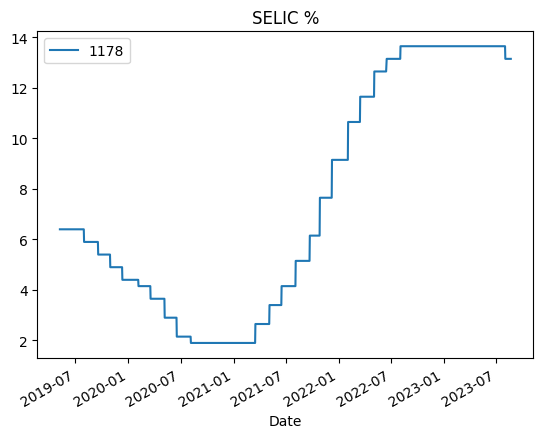

In [ ]:
#plot SELIC

selic_anual.iloc[-360*3:,:].plot(title = 'SELIC %')

In [ ]:
#IGPM

igpm = sgs.get(189)

<Axes: title={'center': 'IGPM 12M %'}, xlabel='Date'>

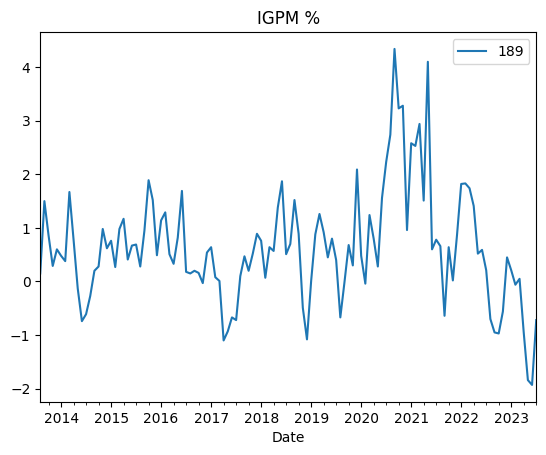

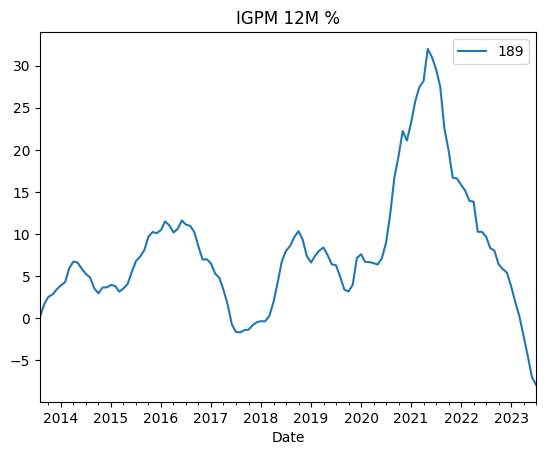

In [ ]:
igpm.iloc[-12*10:,:].plot(title = 'IGPM %')
igpm.iloc[-12*10:,:].rolling('360D').sum().plot(title = 'IGPM 12M %')

In [ ]:
#PIB

pib12 = sgs.get(4382)	#PIB acumulado dos últimos 12 meses - Valores correntes (R$ milhões)
pib = sgs.get(4380) #	PIB mensal - Valores correntes (R$ milhões)

In [ ]:
#pib.resample('1A').sum().loc['2002-12-31':'2022-12-31',:].pct_change(1).plot(title = 'PIB %var 12m')

<Axes: title={'center': 'PIB 12 m'}, xlabel='Date'>

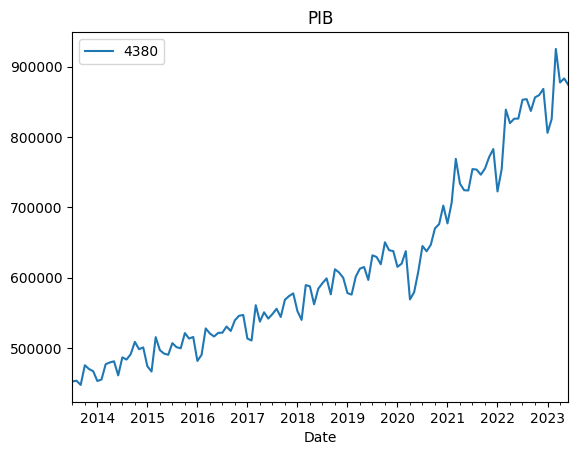

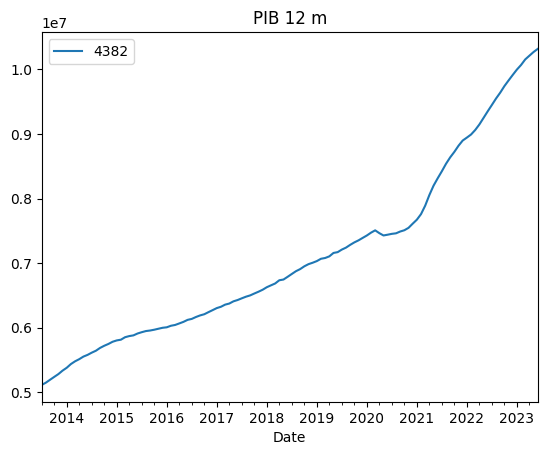

In [ ]:
pib.iloc[-12*10:,:].plot(title = 'PIB')
pib12.iloc[-12*10:,:].plot(title = 'PIB 12 m')

<Axes: title={'center': '\tDívida líquida do governo geral (% PIB)'}, xlabel='Date'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


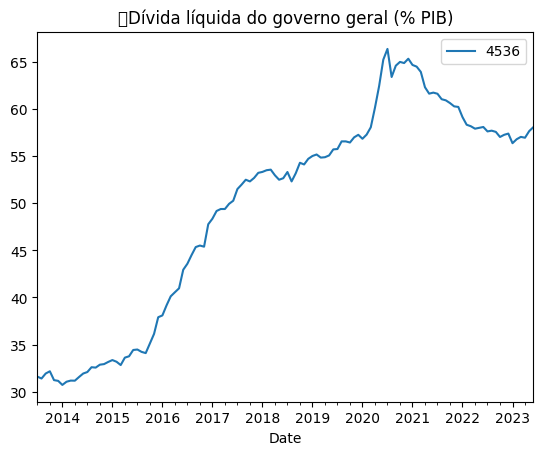

In [ ]:
# 	Dívida líquida do governo geral (% PIB)
div = sgs.get(4536)
div.iloc[-12*10:,:].plot(title = '	Dívida líquida do governo geral (% PIB)')

In [ ]:
# IPCA Extras
ipca_comida = sgs.get(1635)
ipca_casa = sgs.get(1636)
ipca_roupas = sgs.get(1638)
ipca_energia = sgs.get(4453)
ipca_aviao = sgs.get(4456) #Monthly % var.

# Interação com Cotações - Yahoo Finance

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()

In [ ]:
tickers = ['TAEE11.SA', '^BVSP','IRDM11.SA','IFIX.SA','RECR11.SA']
cotacao_full = web.get_data_yahoo(tickers, period='5y')
#print(cotacao_full)
cotacoes = cotacao_full['Adj Close']
abertura= cotacao_full['Open']

[*********************100%%**********************]  5 of 5 completed


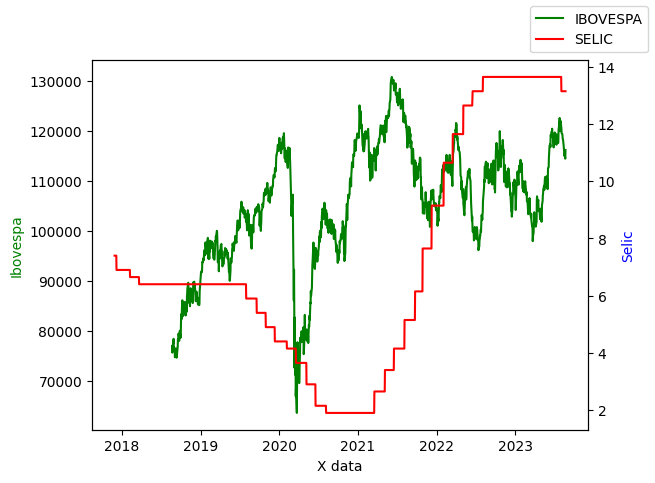

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(cotacoes.index, cotacoes['^BVSP'], color='g')
ax2.plot(selic_anual.iloc[-360*4:,:].index, selic_anual.iloc[-360*4:,:], color='r')

ax1.set_xlabel('X data')
ax1.set_ylabel('Ibovespa', color='g')
ax2.set_ylabel('Selic', color='b')

fig.legend(['IBOVESPA', 'SELIC'])

plt.show()


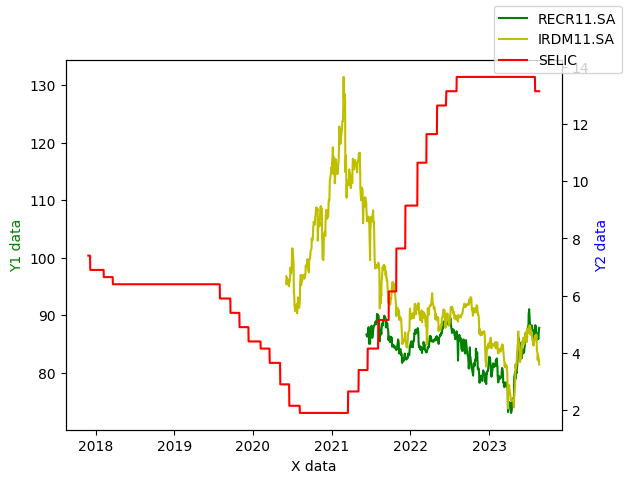

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(cotacoes.index, cotacoes['RECR11.SA'], color='g')
ax1.plot(cotacoes.index, cotacoes['IRDM11.SA'], color='y')
ax2.plot(selic_anual.iloc[-360*4:,:].index, selic_anual.iloc[-360*4:,:], color='r')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

fig.legend(['RECR11.SA','IRDM11.SA', 'SELIC'])

plt.show()


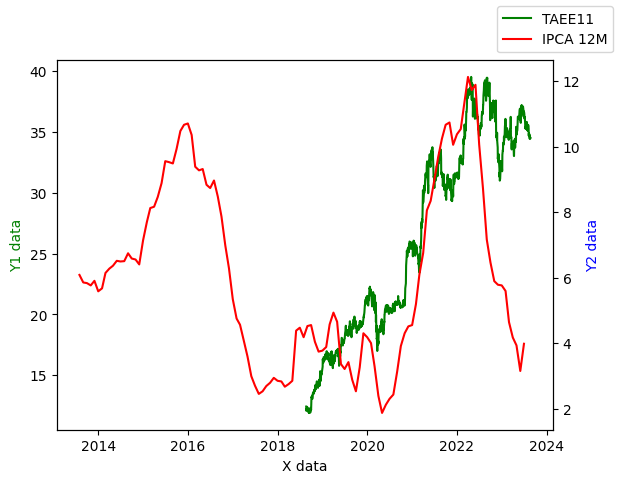

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(cotacoes.index, cotacoes['TAEE11.SA'], color='g')
ax2.plot(ipca_12m.iloc[-12*10:,:].index, ipca_12m.iloc[-12*10:,:], color='r')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

fig.legend(['TAEE11',  'IPCA 12M'])

plt.show()


